In [2]:
from scipy.special import gamma, factorial
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# Exercício 11
# a)

N = 10

# w(i, j) probabilidade de transitar do estado j para i
w = np.zeros((N + 1, N + 1))

# Precorrer todos os estados
for N1 in range(N + 1):
    # Número de partículas no estado j
    # estados finais possíveis
    i1 = N1 + 1
    i2 = N1 - 1
    
    if i1 <= N:
        w[i1, N1] = 1 - N1 / N
    
    if i2 >= 0:
        w[i2, N1] = N1 / N
        
print(w)

[[0.  0.1 0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [1.  0.  0.2 0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.9 0.  0.3 0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.8 0.  0.4 0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.7 0.  0.5 0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.6 0.  0.6 0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.5 0.  0.7 0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.4 0.  0.8 0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.3 0.  0.9 0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.2 0.  1. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.1 0. ]]


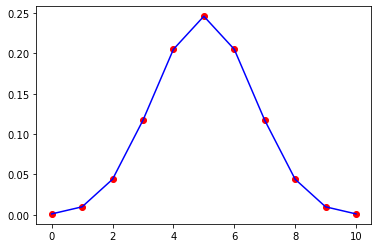

In [13]:
# b)

D, V = np.linalg.eig(w)

idx_vp1 = np.where(D == max(D))[0][0]

ps1 = V[:, idx_vp1] / np.sum(V[:, idx_vp1])

n1 = np.arange(0, N + 1)
pst = factorial(N) / (factorial(N - n1) * factorial(n1)) * 2**(-N)


plt.plot(n1, ps1, 'or', n1, pst, '-b')
plt.show()

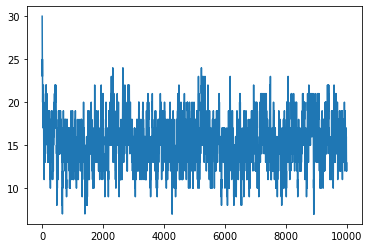

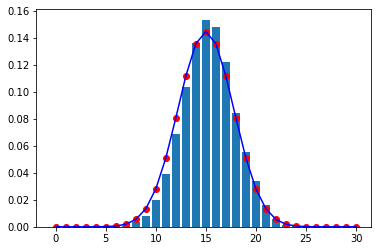

In [143]:
# c)

nt = 10000

N1 = np.zeros(nt + 1)
N1[0] = N

for t in range(nt):
    w1 = 1 - N1[t] / N
    
    if np.random.rand(1) <= w1:
        N1[t + 1] = N1 [t] + 1
    else:
        N1[t + 1] = N1[t] - 1

plt.figure(1)
plt.plot(np.arange(0, nt + 1), N1)

t_st = 100
h, xh = np.histogram(N1[t_st:], np.arange(0, N + 1))
h = h / np.sum(h)

plt.figure(2)
plt.plot(n1, ps1, 'or', n1, pst, '-b')
plt.bar(xh[:-1], h)

plt.show()

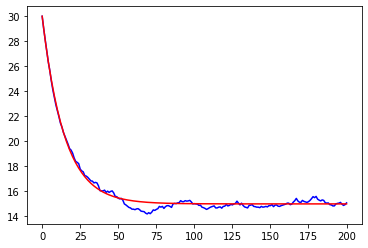

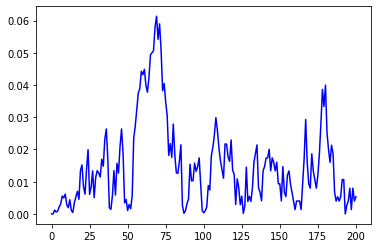

In [163]:
# d)

n = 100

nt = 200

N1 = np.zeros((n, nt + 1))
N1[:, 0] = N

N1_med = np.zeros(nt + 1)
N1_med_t = np.zeros(nt + 1)
N1_dev = np.zeros(nt + 1)

for rep in range(n):
    for t in range(nt):
        w1 = 1 - N1[rep, t] / N

        if np.random.rand(1) <= w1:
            N1[rep, t + 1] = N1 [rep, t] + 1
        else:
            N1[rep, t + 1] = N1[rep, t] - 1

N1_med = np.average(N1, 0)
N1_med_t = (N / 2) + (N - N / 2) * np.exp(- np.arange(0, nt + 1) * np.log(1 / (1 - 2 / N)))

N1_dev = np.abs(N1_med - N1_med_t) / N1_med_t

plt.figure(1)
plt.plot(np.arange(0, nt + 1), N1_med, '-b')
plt.plot(np.arange(0, nt + 1), N1_med_t, '-r')

plt.figure(2)
plt.plot(np.arange(0, nt + 1), N1_dev, '-b')

plt.show()